# Setup and load data
## Install dependencies

In [1]:
%pip install opencv-python-headless matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 1.7 MB/s eta 0:00:0000:0100:010m
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip list

Package                      Version
---------------------------- --------------------
absl-py                      2.0.0
anyio                        4.0.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.13.1
beautifulsoup4               4.12.2
bleach                       6.1.0
blinker                      1.4
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
comm                         0.2.0
contourpy                    1.2.0
cryptography                 3.4.8
cycler                       0.12.1
dbus-python                  1.2.18
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
distro                     

In [2]:
import tensorflow as tf
import os

2023-11-19 20:42:11.917298: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-11-19 20:31:13.984594: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:280] failed call to cuInit: UNKNOWN ERROR (34)


In [3]:
tf.config.list_physical_devices('GPU')

2023-11-19 20:42:14.606032: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:936] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 20:42:14.692971: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:936] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 20:42:14.693024: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:936] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Remove dodgy images

In [4]:
import cv2
import imghdr

/tmp/ipykernel_27/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'

In [6]:
os.listdir(data_dir)

['happy', 'sad']

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
tf.__version__

'2.16.0-dev20231119'

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


2023-11-19 20:42:34.658995: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:936] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 20:42:34.659251: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:936] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 20:42:34.659289: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:936] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 20:42:35.174308: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:936] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-19 20:42:35.174435: I external/local_xla/xla/stream_executor

In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

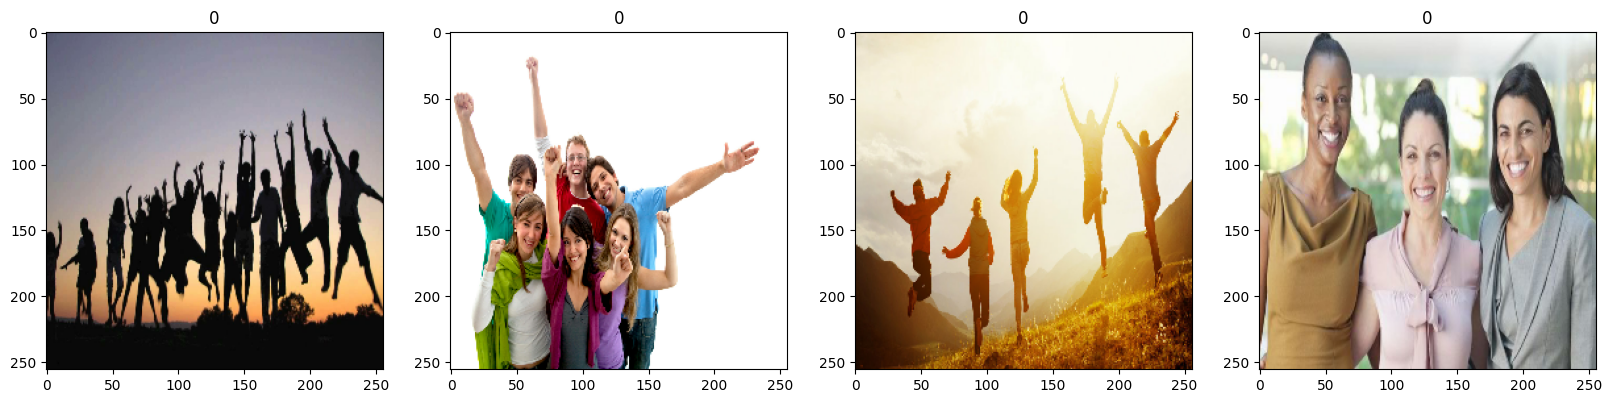

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)      │        448 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)      │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)      │      4,640 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)        │      4,624 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 14400)             │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 256)               │  3,686,656 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 1)                 │        257 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-11-19 20:42:42.913126: I external/local_xla/xla/service/service.cc:144] XLA service 0x7feaa4006ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-19 20:42:42.913201: I external/local_xla/xla/service/service.cc:152]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 with Max-Q Design, Compute Capability 7.5
2023-11-19 20:42:42.998882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-19 20:42:43.438915: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:455] Loaded cuDNN version 8906
2023-11-19 20:42:47.141197: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=1} for conv (f32[32,16,127,127]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,125,125]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backe

3/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5590 - loss: 6.9021 

I0000 00:00:1700426571.857105     156 device_compiler.h:187] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 495ms/step - accuracy: 0.5298 - loss: 7.4644 - val_accuracy: 0.4219 - val_loss: 9.3183
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 382ms/step - accuracy: 0.4899 - loss: 8.2224 - val_accuracy: 0.4844 - val_loss: 8.3109
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 0.4716 - loss: 8.5161 - val_accuracy: 0.4844 - val_loss: 8.3109
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 421ms/step - accuracy: 0.5104 - loss: 7.8913 - val_accuracy: 0.4531 - val_loss: 8.8146
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 394ms/step - accuracy: 0.5035 - loss: 8.0024 - val_accuracy: 0.3750 - val_loss: 10.0738
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step - accuracy: 0.4622 - loss: 8.6678 - val_accuracy: 0.4062 - val_loss: 9.5701
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 391ms/step - accuracy: 0.4869 - loss: 8.2709 - val_accuracy: 0.5156 - val_loss: 7.8072
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 385ms/step - accuracy: 0.4970 - loss: 8.1073 - val_accuracy: 0.5312 - val_loss: 7.5554


# Plot performance

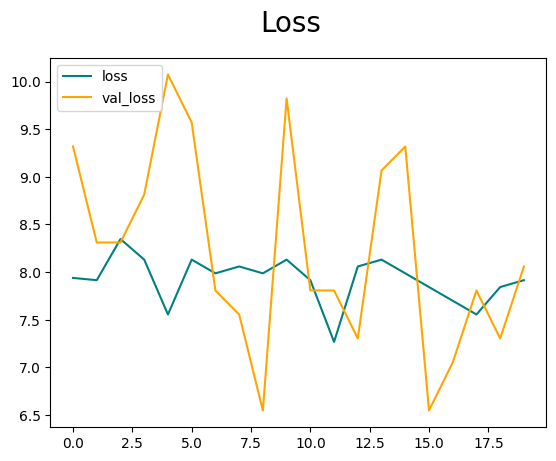

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

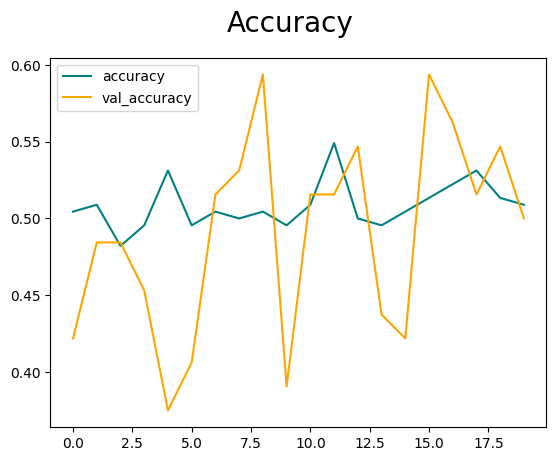

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate the model performance

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


2023-11-19 20:44:20.297733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.23529412, shape=(), dtype=float32)


# Test the model with sample images

In [33]:
import cv2

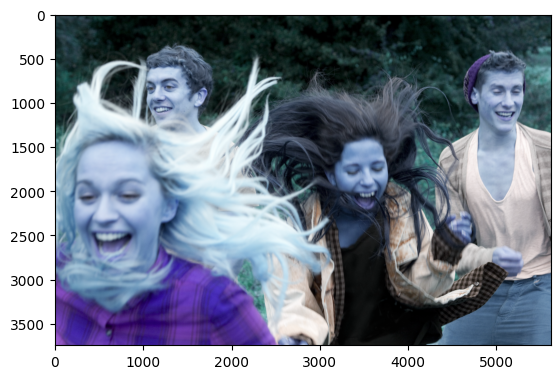

In [36]:
img = cv2.imread(os.path.join(data_dir, 'happy', '154006829.jpg'))
plt.imshow(img)
plt.show()

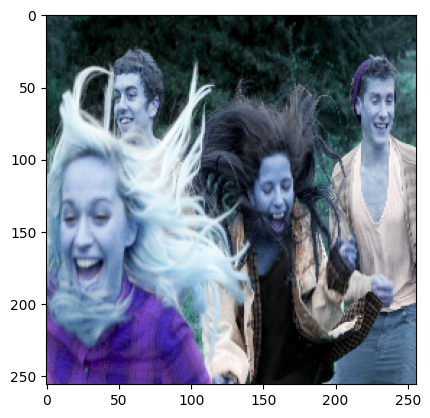

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step


In [39]:
yhat

array([[4.750673e-08]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# Save the model

In [41]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.11/dist-packages/keras/src/models/model.py:342: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  warnings.warn(


In [44]:
new_model = load_model('models/imageclassifier.h5')

In [46]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[4.750673e-08]], dtype=float32)